In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [24]:
!wget -O Cust.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv

--2023-10-18 18:24:08--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36047 (35K) [text/csv]
Saving to: ‘Cust.csv’

Cust.csv            100%[===================>]  35.20K  --.-KB/s    in 0.001s  

2023-10-18 18:24:09 (28.9 MB/s) - ‘Cust.csv’ saved [36047/36047]



In [25]:
df = pd.read_csv('Cust.csv')

In [26]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [27]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

[]

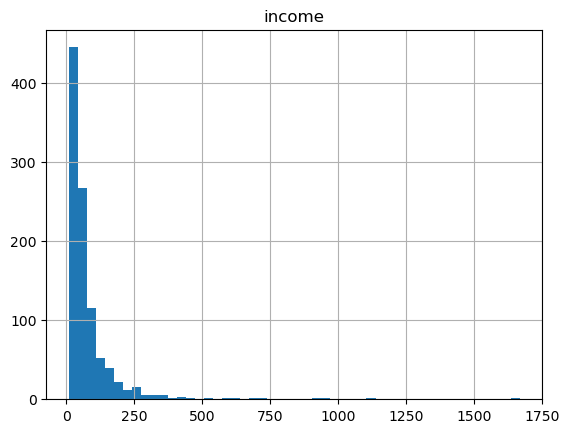

In [28]:
df.hist('income', bins = 50)
plt.plot()

In [29]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [30]:
x.shape, y.shape

((1000, 11), (1000,))

In [31]:
type(x)

numpy.ndarray

In [32]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 38)

In [33]:
train_x.shape

(800, 11)

In [34]:
train_y.shape

(800,)

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)

In [38]:
train_x

array([[ 1.21942758,  1.35284371, -1.32861884, ..., -0.22021079,
         0.97774752,  2.51208824],
       [-0.00921482, -1.39116521, -0.92918439, ..., -0.22021079,
         0.97774752, -0.93148714],
       [-0.00921482,  1.5893962 ,  0.02945829, ..., -0.22021079,
        -1.02275892, -0.24277206],
       ...,
       [-1.23785721, -1.34385471, -1.24873195, ..., -0.22021079,
        -1.02275892,  1.82337316],
       [ 1.21942758, -0.72881823, -0.0504286 , ..., -0.22021079,
         0.97774752, -0.24277206],
       [-1.23785721,  1.4001542 ,  0.26911896, ..., -0.22021079,
         0.97774752, -0.24277206]])

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3).fit(train_x, train_y)

In [42]:
train_pred = knn.predict(train_x)

In [43]:
train_pred.shape, train_y.shape

((800,), (800,))

In [44]:
from sklearn.metrics import accuracy_score
print("training accuracy is : ", accuracy_score(train_pred, train_y))

training accuracy is :  0.56625


In [45]:
test_x

array([[ 2., 15., 46., ...,  0.,  1.,  2.],
       [ 2., 62., 46., ...,  0.,  1.,  1.],
       [ 2.,  5., 33., ...,  0.,  1.,  1.],
       ...,
       [ 3., 45., 39., ...,  0.,  1.,  5.],
       [ 3., 42., 36., ...,  0.,  0.,  3.],
       [ 1.,  3., 55., ...,  0.,  1.,  2.]])

In [46]:
test_x = sc.transform(test_x)

In [47]:
test_x

array([[-0.00921482, -0.96537072,  0.34900585, ..., -0.22021079,
         0.97774752, -0.24277206],
       [-0.00921482,  1.25822271,  0.34900585, ..., -0.22021079,
         0.97774752, -0.93148714],
       [-0.00921482, -1.43847571, -0.68952372, ..., -0.22021079,
         0.97774752, -0.93148714],
       ...,
       [ 1.21942758,  0.45394423, -0.21020238, ..., -0.22021079,
         0.97774752,  1.82337316],
       [ 1.21942758,  0.31201274, -0.44986305, ..., -0.22021079,
        -1.02275892,  0.44594301],
       [-1.23785721, -1.53309671,  1.06798787, ..., -0.22021079,
         0.97774752, -0.24277206]])

In [48]:
test_pred = knn.predict(test_x)

In [50]:
print("test accuracy is : ", accuracy_score(test_pred, test_y))

test accuracy is :  0.255


In [53]:
ks = 10
mean_acc = np.zeros(ks)
std_acc = np.zeros(ks)
for i in range(1, ks+1):
    lm = KNeighborsClassifier(n_neighbors = i).fit(train_x, train_y)
    test_pred = lm.predict(test_x)
    mean_acc[i-1] = accuracy_score(test_pred, test_y)
    std_acc[i-1] = 
mean_acc
    
    

array([0.31 , 0.29 , 0.255, 0.305, 0.3  , 0.355, 0.335, 0.345, 0.365,
       0.33 ])

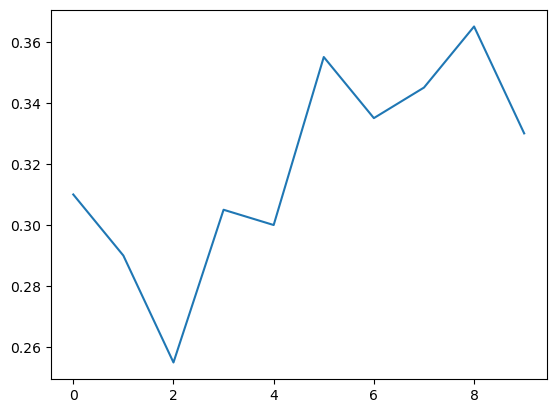

In [56]:
k_values = np.arange(ks)
plt.plot(k_values,mean_acc )

In [55]:
np.arange(1, 11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])